<a href="https://colab.research.google.com/github/Mohammad-H-Zahrawi/Challenges-Kaggle/blob/main/Toxic%20Comment%20Classification/Toxic_Comment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Toxic Comment Classification

In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/Mohammad-H-Zahrawi/Challenges-Kaggle/main/Toxic%20Comment%20Classification/train.csv')
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print('some comments contains non-toxic words')
train[(train['toxic']==0) & (train['severe_toxic']==0) & (train['obscene']==0) & (train['threat']==0) & (train['insult']==0) & (train['identity_hate']==0)][:3]

some comments contains non-toxic words


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0


In [6]:
print('some comments contains toxic words')
train[(train['toxic']==1) & (train['severe_toxic']==1) & (train['obscene']==1) & (train['threat']==1) & (train['insult']==1) & (train['identity_hate']==1)][0:5]

some comments contains toxic words


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
1017,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1
1312,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1
7299,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1
13648,2405c66d017f139e,Bitch \n\nYou are a little bitch. I fuckin spe...,1,1,1,1,1,1
13964,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1


In [7]:
print('Number of missing comments in comment text on dataset:')
train['comment_text'].isnull().sum()

Number of missing comments in comment text on dataset:


0

##NLTK normalization

In [8]:
import re
special_char = re.compile('[/(){}\[\]\|@,;]')
bad_char = re.compile('[^A-Z0-9a-z #+_]')
NEW_LINE = re.compile('\n')

In [9]:
train['comment_text']=train['comment_text'].apply(lambda x:''.join([bad_char.sub(' ',word) for word in x]))
train['comment_text']=train['comment_text'].apply(lambda x:''.join([special_char.sub(' ',word) for word in x]))

In [10]:
train['comment_text'][4000:4010]

4000       Marmot  you re so cool  keep up the good wo...
4001       Continuing the list on needed clean ups  th...
4002    Squeeb I m concerned that you re going to end ...
4003    On September 1  Hitler  attacked Poland  Brita...
4004    I have responded now stop wasting my time I ha...
4005                             or the title of the book
4006    Luckily  Norden1990 is not banned  but only bl...
4007    Why is there more information on the Transform...
4008    But he s a bitch who made a comment only a bit...
4009      Maybe  but I don t think any of that is rele...
Name: comment_text, dtype: object

In [11]:
train['comment_text']=train.loc[:,'comment_text'].apply(str).apply(lambda x:nltk.word_tokenize(x))
train['comment_text'][:7]

0    [Explanation, Why, the, edits, made, under, my...
1    [D, aww, He, matches, this, background, colour...
2    [Hey, man, I, m, really, not, trying, to, edit...
3    [More, I, can, t, make, any, real, suggestions...
4    [You, sir, are, my, hero, Any, chance, you, re...
5    [Congratulations, from, me, as, well, use, the...
6    [COCKSUCKER, BEFORE, YOU, PISS, AROUND, ON, MY...
Name: comment_text, dtype: object

In [12]:
train['comment_text']=train['comment_text'].apply(list).apply(lambda x:([NEW_LINE.sub('',word) for word in x]))

In [13]:
train['comment_text']=train.loc[:,'comment_text'].apply(list).apply(lambda x : [word.lower() for word in x if word.isalnum() and word.isalpha()])
train['comment_text'][:7]

0    [explanation, why, the, edits, made, under, my...
1    [d, aww, he, matches, this, background, colour...
2    [hey, man, i, m, really, not, trying, to, edit...
3    [more, i, can, t, make, any, real, suggestions...
4    [you, sir, are, my, hero, any, chance, you, re...
5    [congratulations, from, me, as, well, use, the...
6    [cocksucker, before, you, piss, around, on, my...
Name: comment_text, dtype: object

In [14]:
# note: this loop will take several minutes, so I recommend to chunk the interval (o,len(train)) into many intervals
# like first interval (0,20000) , second (20000,40000) , ... etc

for i in range(0,159571):
    train['comment_text'][i] = [word for word in train['comment_text'][i] if word not in stopwords.words('english') ]
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0
1,000103f0d9cfb60f,"[aww, matches, background, colour, seemingly, ...",0,0,0,0,0,0
2,000113f07ec002fd,"[hey, man, really, trying, edit, war, guy, con...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"[make, real, suggestions, improvement, wondere...",0,0,0,0,0,0
4,0001d958c54c6e35,"[sir, hero, chance, remember, page]",0,0,0,0,0,0


In [16]:
(print(train['comment_text'][110001]))


['discussion', 'made', 'edits']


In [17]:
train['comment_text']=train['comment_text'].apply(list).apply(lambda x:' '.join(x))

In [18]:
train.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [19]:
train.fillna(axis=0,value='safe',inplace=True)

In [20]:
train.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,aww matches background colour seemingly stuck ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0


##split dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train , test = train_test_split(train, random_state=11 , test_size=0.1, shuffle = True)

In [23]:
train.count()

id               143613
comment_text     143613
toxic            143613
severe_toxic     143613
obscene          143613
threat           143613
insult           143613
identity_hate    143613
dtype: int64

In [24]:
test.count()

id               15958
comment_text     15958
toxic            15958
severe_toxic     15958
obscene          15958
threat           15958
insult           15958
identity_hate    15958
dtype: int64

In [25]:
print(train.shape)
print(test.shape)

(143613, 8)
(15958, 8)


##Data mining

In [26]:
def count_labels (df):
    df_toxic = df.drop(['comment_text','id'],axis=1)
    counts = []
    categories = list(df_toxic.columns.values)
    for i in categories:
        counts.append((i,df_toxic[i].sum()))
    return pd.DataFrame(data=counts,columns=['category','number of comments'])

In [27]:
df_stats_train = count_labels(train)
df_stats_train

,category,number of comments
0,toxic,13755
1,severe_toxic,1448
2,obscene,7614
3,threat,423
4,insult,7089
5,identity_hate,1244


In [28]:
df_stats_test = count_labels(test)
df_stats_test

,category,number of comments
0,toxic,1539
1,severe_toxic,147
2,obscene,835
3,threat,55
4,insult,788
5,identity_hate,161


## Seaborn

In [29]:
import seaborn as sns

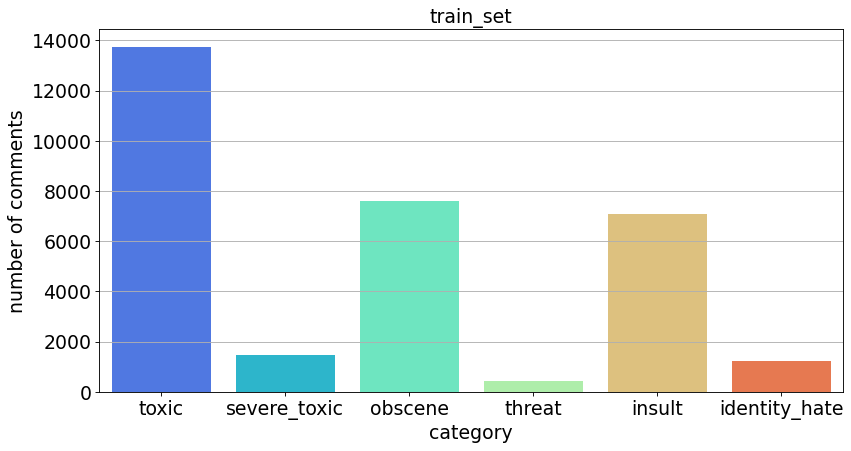

In [30]:
plt.figure(figsize=(12,6),dpi=80)
plt.grid(axis='y')
plt.tick_params(axis='both', labelsize=17)
plt.xlabel('category',fontsize=17)
plt.ylabel('Number of comments',fontsize=17)
plt.title('train_set',fontsize=17)
sns.barplot(x='category',y='number of comments',data = df_stats_train,palette='rainbow')

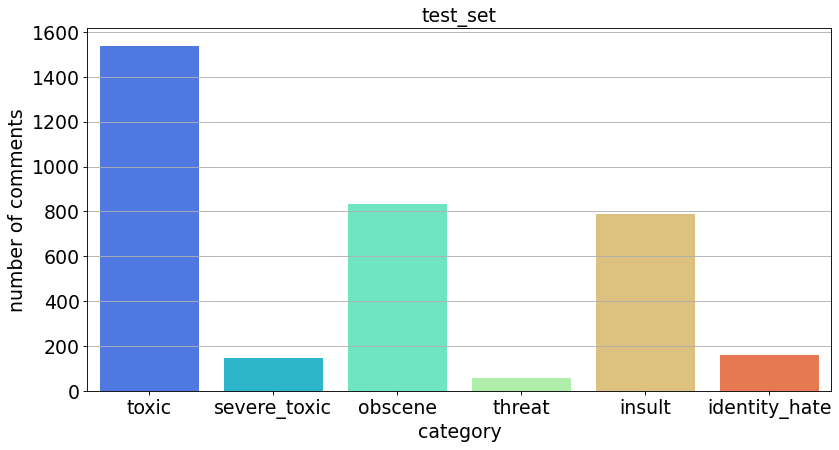

In [31]:
plt.figure(figsize=(12,6),dpi=80)
plt.grid(axis='y')
plt.tick_params(axis='both', labelsize=17)
plt.xlabel('category',fontsize=17)
plt.ylabel('Number of comments',fontsize=17)
plt.title('test_set',fontsize=17)
sns.barplot(x='category',y='number of comments',data = df_stats_test,palette='rainbow',)

In [32]:
row_sum=train.iloc[:,2:].sum(axis=1 )
x=row_sum.value_counts()
x

0    129027
1      5702
3      3785
2      3138
4      1591
5       344
6        26
dtype: int64

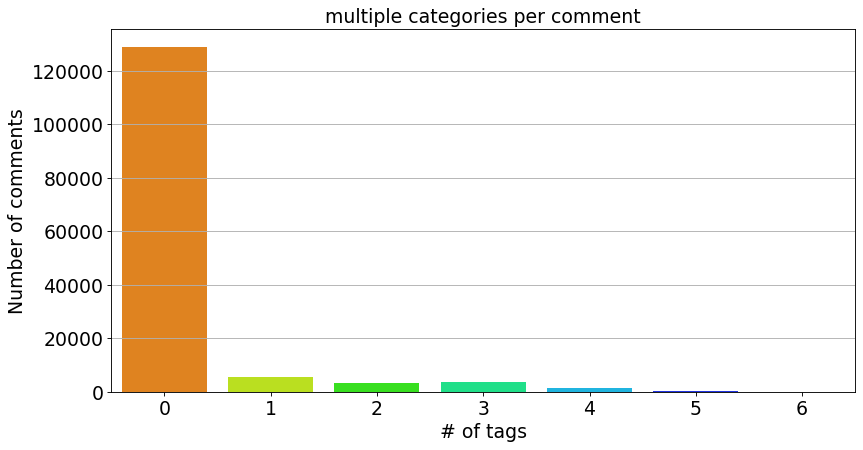

In [33]:
plt.figure(figsize=(12,6),dpi=80)
plt.tick_params(axis='both', labelsize=17)
plt.xlabel('# of tags',fontsize=17)
plt.ylabel('Number of comments',fontsize=17)
plt.title('multiple categories per comment',fontsize=17)
plt.grid()
sns.barplot(x=x.index,y=x.values,palette='gist_rainbow')

In [34]:
print('Percentage of comments that are not labelled:',(round((x[0])*100/sum(x)),2),'%')
#about 90% of our comments are safe.

Percentage of comments that are not labelled: (90, 2) %


In [35]:
lens = train.comment_text.str.len()

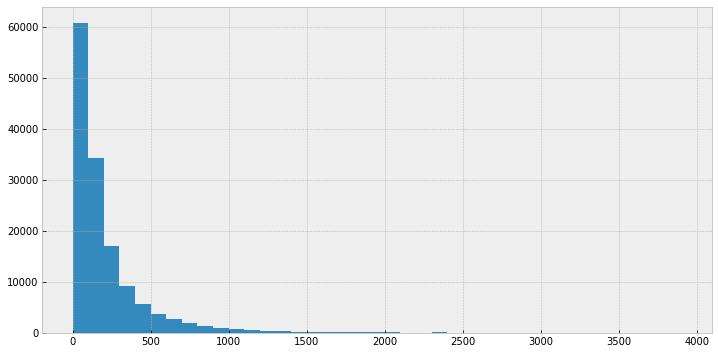

In [36]:
plt.figure(figsize=(12,6))
plt.style.use('bmh')
lens.hist(bins = np.arange(0,4000,100))

##Machine Learing

In [37]:
x_train, y_train = train['comment_text'].values,train.iloc[:,2:].values
x_test, y_test = test['comment_text'].values,test.iloc[:,2:].values

In [38]:
x_train[:3]

array(['hate freedom',
       'never seen compromise anything compromise position net worth issue include material full article fair compromise given failed entirely show anywhere nearly notable enough infobox utter lack politicians information infoboxes talk',
       'oppose numerous artists listed stage name lady gaga madonna entertainer snoop dogg cool j cent eminem many wikipedia take position birth names take precedence common names later uses birth name professionally change'],
      dtype=object)

In [39]:
y_train[1:2]

array([[0, 0, 0, 0, 0, 0]])

In [40]:
print('X_train shape ', x_train.shape)
print('y_train shape ', y_train.shape)
print('X_test shape ', x_test.shape)
print('y_test shape', y_test.shape)

X_train shape  (143613,)
y_train shape  (143613, 6)
X_test shape  (15958,)
y_test shape (15958, 6)


In [41]:
classes = {0:'toxic',1:'severe_toxic',2:'obscene',3:'threat',4:'insult',5:'identity_hate'}

In [42]:
def convertClass(tags,classes):
    result = []
    for i, tag  in enumerate(tags):
        if tag>0:
            result.append(classes[i])
    if len(result)==0:
        result.append('safe')
    return result

In [43]:
[tag for tag in y_test[:5]]

[array([0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0])]

In [44]:
y_train = np.array([convertClass(tag,classes) for tag in y_train])
y_test = np.array([convertClass(tag,classes) for tag in y_test])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


##Data transformation

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
def tfidf_features (x_train,x_test):
    tfidf_vectorizer = TfidfVectorizer(min_df=5,max_df=0.9,ngram_range=(1,2),token_pattern='(\S+)')
    tfidf_vectorizer.fit(x_train)
    x_train = tfidf_vectorizer.transform(x_train)
    x_test = tfidf_vectorizer.transform(x_test)

    return (x_train,x_test,tfidf_vectorizer.vocabulary_)

In [50]:
x_train_tfidf , x_test_tfidf,tfidf_vocab = tfidf_features(x_train,x_test)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [51]:
print('x_train_tfidf shape ', x_train_tfidf.shape)
print('x_test_tfidf shape ', x_test_tfidf.shape)

x_train_tfidf shape  (143613, 131238)
x_test_tfidf shape  (15958, 131238)


##Training the classifier

In [52]:
tags_counts = {}
for tags in y_train:
    for tag in tags:
        if tag in tags_counts:
            tags_counts[tag] +=1
        else:
            tags_counts[tag] = 1

            
words_counts = {}
for title in x_train:
    for word in title.split():
        if word in words_counts:
            words_counts[word] +=1
        else:
            words_counts[word] = 1         

In [53]:
most_common_tags = sorted(tags_counts.items(),key=lambda x:x[1],reverse=True)
most_common_words = sorted(words_counts.items(),key=lambda x:x[1],reverse=True)

In [54]:
print(most_common_tags)

[('safe', 129027), ('toxic', 13755), ('obscene', 7614), ('insult', 7089), ('severe_toxic', 1448), ('identity_hate', 1244), ('threat', 423)]


In [55]:
from sklearn.preprocessing import MultiLabelBinarizer

In [56]:
mlb = MultiLabelBinarizer(classes = sorted(tags_counts.keys()))

In [57]:
y_train_transformed = mlb.fit_transform(y_train)
y_test_transformed= mlb.fit_transform(y_test)

In [58]:
print(y_train_transformed[62])
print(y_train[62])

[0 0 0 1 0 0 0]
['safe']


In [59]:
from sklearn.multiclass  import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression , RidgeClassifier

In [60]:
def train_classifier(x_train , y_train_transformed):
    lr = LogisticRegression(C=4.0,penalty='l2')
    ovr = OneVsRestClassifier(lr)
    ovr.fit(x_train,y_train_transformed)
    return (ovr)

In [61]:
classifier_tfidf = train_classifier(x_train_tfidf, y_train_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [62]:
y_train_predicted_label = classifier_tfidf.predict(x_train_tfidf)
y_train_predicted_score = classifier_tfidf.decision_function(x_train_tfidf)

In [63]:
y_train_predicted_inverse = mlb.inverse_transform(y_train_predicted_label)
y_train_inversed = mlb.inverse_transform(y_train_transformed)

In [64]:
for i,text in enumerate(x_train[160:164]):
    print('\nTitle:',text,'\nTrue Label:',y_train_inversed[160:164][i],'\nPredicted Label',y_train_predicted_inverse[160:164][i])


Title: e c know perfect responded ip banned harasser may list ips consider banned harassers information ip gave interesting shows misbehaviour current threat ani thread talkpage threatened block opening discussion thread blocked revoked talkpage access without warning edit summary blocked another editor warning take look mirror multiple misuses tools hours plus involved arbcom beckons 
True Label: ('safe',) 
Predicted Label ('safe',)

Title: criticize execution witnessed letter nothing indicate ever renounced castro 
True Label: ('safe',) 
Predicted Label ('safe',)

Title: crankscorpion imaged basaltic columns near lamont doherty earth observatory palisades new york unaware columns would like vist image road columns wish visit live bronx send directions columns thanks 
True Label: ('safe',) 
Predicted Label ('safe',)

Title: categories polite title dark lord thing 
True Label: ('safe',) 
Predicted Label ('safe',)


In [65]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [66]:
def print_evaluation_scores(y_val, predicted):

    print('Accuracy:',accuracy_score(y_val, predicted))
    print('F1 Score:',f1_score(y_val, predicted, average='weighted'))
    print('Precision:',average_precision_score(y_val, predicted,average='weighted'))
    print('Recall:',recall_score(y_val, predicted,average='weighted'))

In [67]:
y_test_predicted_label = classifier_tfidf.predict(x_test_tfidf)
y_test_predicted_scores = classifier_tfidf.decision_function(x_test_tfidf)

In [68]:
y_test_pred_inversed = mlb.inverse_transform(y_test_predicted_label)
y_test_inversed = mlb.inverse_transform(y_test_transformed)

In [69]:
print_evaluation_scores(y_test_transformed, y_test_predicted_label)

Accuracy: 0.9182854994360196
F1 Score: 0.9212152483021829
Precision: 0.8783432221592081
Recall: 0.9144810580587313


In [70]:
from sklearn.metrics import roc_auc_score
%matplotlib inline

In [71]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_transformed , y_test_predicted_scores)

0.9790584509005106

In [72]:
# save the model to disk
import pickle
filename = 'classify_wiki_comments.sav'
pickle.dump(classifier_tfidf, open(filename, 'wb'))

In [73]:
# in case you would like to reload the model from the disk. just do
loaded_model = pickle.load(open(filename, 'rb'))

## The End